Este conjunto de datos se puede utilizar para predecir la gravedad (benigna o maligna)
de una masa mamográfica a partir de los atributos BI-RADS y la edad de la paciente. Contiene una evaluación BI-RADS, la edad del paciente y tres atributos BI-RADS junto con la gravedad para 516 casos benignos y 445 masas malignas que se han identificado en mamografías digitales de campo completo recogidos en el Instituto de Radiología de la Universidad Erlangen-Nuremberg entre 2003 y 2006.
Cada instancia tiene una evaluación BI-RADS asociada que varía de 1 (definitivamente benigna)
a 5 (altamente sugestivo de malignidad) asignado en un proceso de doble revisión por
médicos

### Ejercicio

- Generar un conjunto de entrenamiento y uno de prueba
- Entrenar el modelo
- Hacer predicciones sobre el conjunto de prueba
- Evaluar el modelo

¿El modelo logra clasificar correctamente los casos de prueba?
¿Cómo afectaría en la realidad el error de este modelo?


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mammogram_dataset.csv')
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1


In [3]:
#df["density"].replace(-100000, to_replace= int(df.mode(axis=0)["density"]))
df['density'] = df['density'].replace([-100000], df.mode(axis=0)["density"])
df['BI_RADS_assessment'] = df['BI_RADS_assessment'].replace([-100000], df.mode(axis=0)["BI_RADS_assessment"])
df['age'] = df['age'].replace([-100000], df.mode(axis=0)["age"])
df['shape'] = df['shape'].replace([-100000], df.mode(axis=0)["shape"])
df['margin'] = df['margin'].replace([-100000], df.mode(axis=0)["margin"])
df['severity'] = df['severity'].replace([-100000], df.mode(axis=0)["severity"])

# Datos 

In [4]:
data = df.values[:, 1:6]
data

array([[67,  3,  5,  3,  1],
       [43,  1,  1,  3,  1],
       [58,  4,  5,  3,  1],
       ...,
       [64,  4,  5,  3,  0],
       [66,  4,  5,  3,  1],
       [62,  3,  3,  3,  0]])

# Subconjunto de clases - etiquetas

In [5]:
target = df.values[:, 0]
target

array([ 5,  4,  5,  4,  5,  4,  4,  5,  5,  5,  5,  3,  4,  4,  4,  4,  3,
        4,  4,  4,  4,  5,  4,  5,  4,  5,  2,  5,  5,  5,  4,  5,  5,  4,
        4,  4,  4,  5,  4,  4,  4,  4,  4,  4,  5,  5,  5,  4,  2,  5,  4,
        5,  4,  4,  4,  4,  4,  5,  4,  5,  5,  5,  4,  3,  5,  4,  4,  5,
        4,  4,  4,  5,  5,  5,  5,  4,  5,  4,  5,  5,  4,  5,  3,  4,  5,
        4,  5,  5,  4,  5,  4,  4,  4,  5,  5,  5,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  4,  4,  3,  4,  5,  4,  5,  5,  4,  4,  4,  4,  4,  5,
        5,  5,  4,  4,  4,  5,  4,  4,  4,  4,  5,  5,  5,  5,  4,  5,  5,
        4,  5,  4,  5,  5,  4,  4,  4,  4,  5,  5,  4,  4,  4,  5,  5,  4,
        4,  3,  4,  5,  4,  4,  4,  5,  4,  4,  4,  4,  5,  4,  4,  5,  5,
        4,  4,  4,  4,  4,  5,  4,  4,  5,  5,  4,  5,  4,  4,  4,  5,  5,
        4,  5,  5,  4,  5,  5,  4,  4,  5,  4,  5,  4,  4,  4,  3,  4,  2,
        4,  5,  4,  4,  4,  4,  4,  4,  2,  5,  5,  4,  4,  4,  5,  3,  3,
        4,  5,  5,  5,  4

# Conjuntos de entrenamiento y prueba

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)


# Entrenar modelo

In [7]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

# Obtener predicciones

In [8]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 4, 4, 4, 4, 0, 0, 4, 0, 0, 2, 0, 0, 0, 5, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 5, 4, 4, 0, 4, 5, 4, 0, 0, 0, 5, 4, 0, 4, 2, 4, 4, 4, 5, 4,
       0, 4, 5, 5, 5, 0, 4, 2, 4, 5, 0, 0, 4, 0, 4, 5, 0, 4, 4, 5, 0, 0,
       4, 5, 0, 4, 4, 4, 0, 0, 4, 2, 2, 0, 0, 4, 5, 0, 0, 0, 4, 0, 0, 2,
       5, 0, 4, 4, 5, 0, 0, 5, 0, 0, 0, 6, 4, 0, 0, 0, 4, 4, 4, 4, 0, 2,
       0, 5, 4, 4, 0, 4, 4, 0, 4, 0, 4, 0, 2, 4, 0, 4, 4, 0, 4, 4, 4, 5,
       4, 0, 0, 4, 4, 0, 4, 5, 0, 0, 0, 4, 0, 4, 5, 4, 5, 0, 0, 4, 0, 4,
       5, 4, 4, 5, 0, 2, 0, 0, 4, 5, 0, 4, 0, 2, 4, 4, 5, 4, 0, 4, 5, 5,
       0, 4, 5, 4, 0, 4, 2, 2, 0, 5, 4, 4, 0, 2, 4, 0, 4, 4, 4, 4, 0, 4,
       4, 4, 2, 4, 4, 0, 2, 0, 0, 4, 5, 0, 4, 4, 0, 0, 0, 5, 0, 4, 4, 4,
       0, 4, 0, 2, 0, 0, 4, 5, 0, 4, 0, 4, 0, 2, 5, 2, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 5, 0, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 5, 4, 4, 4, 4, 4, 0, 0,
       5, 0, 0])

# Comprobar las predicciones

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.48788927335640137

# Armado de la matriz

In [10]:
metrics.confusion_matrix(y_test, y_pred)

array([[  1,   0,   0,   0,   1,   0,   0],
       [  1,   3,   0,   1,   0,   0,   0],
       [  2,   1,   0,   6,   0,   0,   0],
       [ 36,  14,   0, 109,   6,   0,   0],
       [ 68,   0,   0,   8,  28,   1,   0],
       [  1,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

### Gráfica

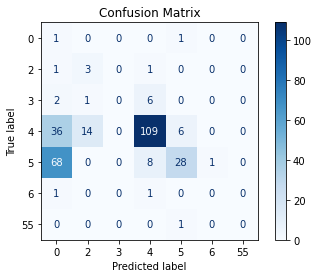

In [11]:
disp = metrics.plot_confusion_matrix(gnb, x_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

# Conclusión

El sistema no solo comete **falsos positivos**, sino que puede variar. Los datos de entrada al sistema cuentan con errores, por lo que las salidas tienen datos incongruentes.


Por lo tanto decimos que:

### No clasifica correctamente